<a href="https://colab.research.google.com/github/francji1/01NAEX/blob/main/code/01NAEX_Exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# O1NAEX Exercise 07

## Problem 6.31 + 6.32

from the chapter 6, D. C. Montgomery DAoE - 8. edition.

An experiment was conducted on a chemical process that produces a
polymer. The four factors studied were temperature (A), catalyst
concentration (B), time (C), and pressure (D). Two responses, molecular
weight and viscosity, were observed. The design matrix and response data
are following:

In [193]:
# !pip install pyDOE3

In [194]:
from pyDOE3 import ff2n
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from matplotlib import cm

df631 = pd.read_csv("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Problem_6_31.txt", sep=";")
df631.head()

,Temperature,Concentration,Time,Pressure,Weight,Viscosity
0,100,4,20,60.0,2400,1400
1,120,4,20,60.0,2410,1500
2,100,8,20,60.0,2315,1520
3,120,8,20,60.0,2510,1630
4,100,4,30,60.0,2615,1380


In [195]:
m = ff2n(4)
m = m[:, ::-1]

m_df = pd.DataFrame(m, columns=["A", "B", "C", "D"])
Weight = df631.loc[0:15, "Weight"].values
Viscosity = df631.loc[0:15, "Viscosity"].values
m_df['Weight'] = Weight
m_df['Viscosity'] = Viscosity
response_names = m_df.columns[-2:].tolist()

print("Response names:", response_names)
print(m_df)

Response names: ['Weight', 'Viscosity']
      A    B    C    D  Weight  Viscosity
0  -1.0 -1.0 -1.0 -1.0    2400       1400
1   1.0 -1.0 -1.0 -1.0    2410       1500
2  -1.0  1.0 -1.0 -1.0    2315       1520
3   1.0  1.0 -1.0 -1.0    2510       1630
4  -1.0 -1.0  1.0 -1.0    2615       1380
5   1.0 -1.0  1.0 -1.0    2625       1525
6  -1.0  1.0  1.0 -1.0    2400       1500
7   1.0  1.0  1.0 -1.0    2750       1620
8  -1.0 -1.0 -1.0  1.0    2400       1400
9   1.0 -1.0 -1.0  1.0    2390       1525
10 -1.0  1.0 -1.0  1.0    2300       1500
11  1.0  1.0 -1.0  1.0    2520       1500
12 -1.0 -1.0  1.0  1.0    2625       1420
13  1.0 -1.0  1.0  1.0    2630       1490
14 -1.0  1.0  1.0  1.0    2500       1500
15  1.0  1.0  1.0  1.0    2710       1600


In [196]:
df626 = pd.read_csv("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Ex06_26.csv", sep=";")
df626.head()

,Aperture,ExposureTime,DevelopTime,MaskDimension,EtchTime,Yield
0,small,-20,30.0,Small,14.5,7
1,large,-20,30.0,Small,14.5,9
2,small,20,30.0,Small,14.5,34
3,large,20,30.0,Small,14.5,55
4,small,-20,45.0,Small,14.5,16


##	Problems 6.26 and 6.27 and 7.7
from the chapters 6 and 7, D. C. Montgomery DAoE - 8. edition.

An experiment was run in a semiconductor fabrication plant in an effort to increase yield. Five factors, each at two levels, were studied. The factors (and levels) were 
+ A = aperture setting (small, large),
+ B = exposure time (20% below nominal, 20% above nominal),
+ C = development time (30 and 45 s),
+ D = mask dimension (small, large), and
+ E = etch time (14.5 and 15.5min).

The unreplicated $2^5$ design shown below was run.

In [197]:
import pandas as pd

# Define new column names
new_column_names = ["A", "B", "C", "D", "E"]

# Rename columns
df626.rename(columns=dict(zip(df626.columns, new_column_names)), inplace=True)


In [198]:
df626_df.head()

,A,B,C,D,E,Yield
0,-1.0,-1.0,-1.0,-1.0,-1.0,7
1,1.0,-1.0,-1.0,-1.0,-1.0,9
2,-1.0,-1.0,-1.0,-1.0,-1.0,34
3,1.0,-1.0,-1.0,-1.0,-1.0,55
4,-1.0,-1.0,-1.0,-1.0,-1.0,16


In [199]:
pd.set_option('future.no_silent_downcasting', True)

# Rename variable values
df626["B"] = df626["B"].apply(lambda x: -1.0 if x < 15 else 1.0)
df626["E"] = df626["E"].apply(lambda x: -1.0 if x < 15 else 1.0)
df626["C"] = df626["C"].apply(lambda x: -1.0 if x < 40 else 1.0)

df626["A"] = df626["A"].replace({"small": -1.0, "large": 1.0}).infer_objects(copy=False)
df626["D"] = df626["D"].replace({"Small": -1.0, "Large": 1.0}).infer_objects(copy=False)

# Change data types to categorical
df626[new_column_names] = df626[new_column_names].astype("category")

# View the renamed dataframe
df626.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   A       36 non-null     category
 1   B       36 non-null     category
 2   C       36 non-null     category
 3   D       36 non-null     category
 4   E       36 non-null     category
 5   Yield   36 non-null     int64   
dtypes: category(5), int64(1)
memory usage: 1.2 KB


In [200]:
df626.head()

,A,B,C,D,E,Yield
0,-1.0,-1.0,-1.0,-1.0,-1.0,7
1,1.0,-1.0,-1.0,-1.0,-1.0,9
2,-1.0,1.0,-1.0,-1.0,-1.0,34
3,1.0,1.0,-1.0,-1.0,-1.0,55
4,-1.0,-1.0,1.0,-1.0,-1.0,16


In [201]:
df626_cp = df626.iloc[-4:] # Center points
df626_df = df626.iloc[:-4] # Working points

---
**a) Construct a normal probability plot of the effect estimates.
Which effects appear to be large?**

---

In [202]:
# Fit the linear model
model_full = smf.ols("Yield ~ (A + B + C + D + E)**2", data=df626_df).fit()
xnames = ['Intercept', 'A', 'B', 'C', 'D', 'E',
          'A:B', 'A:C', 'A:D', 'A:E', 'B:C', 'B:D', 'B:E', 'C:D', 'C:E', 'D:E']
# Summarize the model
model_full.summary(xname=xnames)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yield   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     311.9
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           7.92e-17
Time:                        00:00:36   Log-Likelihood:                -48.876
No. Observations:                  32   AIC:                             129.8
Df Residuals:                      16   BIC:                             153.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5625      1.115      6.785      0.000       5.200       9.925
A              2.5625      1.246      2.056      0.056      -0.079       5.204
B             26.0625      1.246     20.915      0.000      23.421      28.704
C              8.0625      1.246      6.470      0.000       5.421      10.704
D              0.3125      1.246      0.251      0.805      -2.329       2.954
E             -0.1875      1.246     -0.150      0.882      -2.829       2.454
A:B           15.8750      1.115     14.244      0.000      13.512      18.238
A:C            0.8750      1.115      0.785      0.444      -1.488       3.238
A:D           -0.1250      1.115     -0.112      0.912      -2.488       2.238
A:E            1.8750      1.115      1.682      0.112      -0.488       4.238
B:C            0.1250      1.115      0.112      0.912      -2.238       2.488
B:D           -1.3750      1.115     -1.234      0.235      -3.738       0.988
B:E            1.1250      1.115      1.009      0.328      -1.238       3.488
C:D            1.6250      1.115      1.458      0.164      -0.738       3.988
C:E            0.6250      1.115      0.561      0.583      -1.738       2.988
D:E           -2.3750      1.115     -2.131      0.049      -4.738      -0.012
==============================================================================
Omnibus:                        1.838   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                0.767
Skew:                           0.078   Prob(JB):                        0.681
Kurtosis:                       3.742   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
# I would not like to be influenced (biased) by the p-value of the full model ANOVA hence not showing here
full_anova = sm.stats.anova_lm(model_full, typ=2);

In [204]:
coeffs = model_full.params * 2
coeffs.index = xnames
full_total_ssq = full_anova["sum_sq"].sum()
effects_df = pd.DataFrame(coeffs,columns=["Effects"])
effects_df["Sum Sq."] = full_anova["sum_sq"]
effects_df["Percent contribution"] = full_anova["sum_sq"].map(lambda x: 100*x / full_total_ssq)

In [205]:
effects_df

,Effects,Sum Sq.,Percent contribution
Intercept,15.125,NaN,NaN
A,5.125,1116.28125,9.570338
B,52.125,9214.03125,78.995678
C,16.125,750.78125,6.436756
D,0.625,5.28125,0.045278
E,-0.375,1.53125,0.013128
A:B,31.750,504.03125,4.321267
A:C,1.750,1.53125,0.013128
A:D,-0.250,0.03125,0.000268
A:E,3.750,7.03125,0.060282


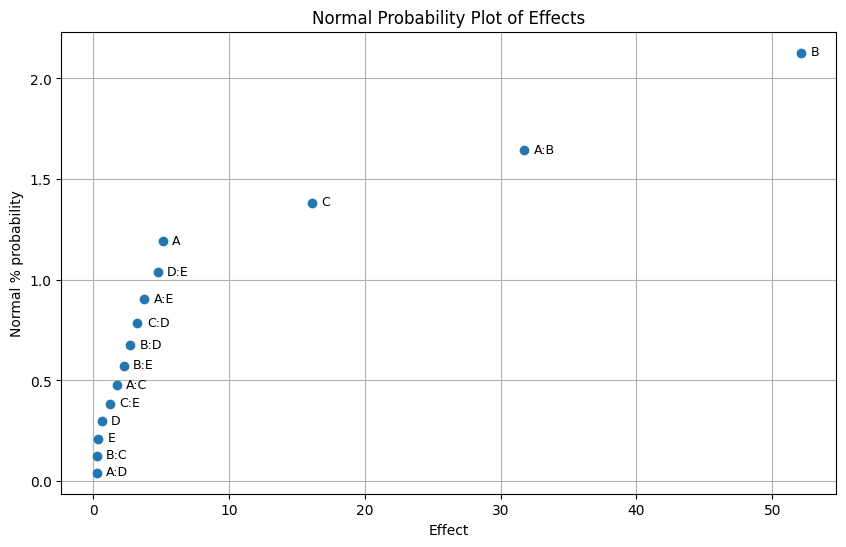

In [206]:
effects_no_intercept = effects_df.drop('Intercept')
effects_abs = effects_no_intercept['Effects'].abs()
effects_sorted = effects_abs.sort_values()
effect_names_sorted = effects_sorted.index.tolist()

n = len(effects_sorted)
i = np.arange(1, n + 1)
probabilities = (i - 0.5) / n
expected_values = stats.halfnorm.ppf(probabilities)

plt.figure(figsize=(10, 6))
plt.plot(effects_sorted, expected_values,'o')


for x, y, label in zip(effects_sorted,expected_values, effect_names_sorted):
    plt.text(x+0.7, y-0.015, label, fontsize=9, ha='left')

plt.xlabel('Effect')
plt.ylabel('Normal % probability')
plt.title('Normal Probability Plot of Effects')
plt.grid(True)
plt.show()

Most important are the factors 
+ `B` and `E`

and the interactions 
+ `B:C`, `A:B`, `C:E` and `B:E`.

---
**b) Conduct an analysis of variance to confirm your findings
for part (a).**

---

In [111]:
model_reduced = smf.ols('Yield ~ B + E + B:C + A:B + C:E + B:E', data=df626).fit()
anova_results = sm.stats.anova_lm(model_reduced, typ=2)
anova_results

,sum_sq,df,F,PR(>F)
B,5080.387821,1.0,15.731190,0.000484
E,890.157051,1.0,2.756331,0.108442
B:C,974.496429,2.0,1.508742,0.239253
A:B,1608.300000,2.0,2.490014,0.101753
C:E,569.335714,1.0,1.762922,0.195377
B:E,534.942857,1.0,1.656426,0.209011
Residual,8719.650000,27.0,NaN,NaN


In [112]:
sm.stats.anova_lm(model_reduced, model_full, typ="I")

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,27.0,8719.650000,0.0,NaN,NaN,NaN
1,20.0,8688.859722,7.0,30.790278,0.010125,0.999999


ANOVA (both of them) has somewhat confirmed the findings. Even though the $p$-value is not optimal for `E` and `A:B`, I decided to keep those for the sake of keeping these factors in the models atleast in thier interactions. If we remove the interaction `C:E` we will eliminate the factor `C` from the model completely, but according to the model fitted below, this is a reasonable choice.

In [113]:
model_reduceder = smf.ols('Yield ~ B + E + A:B + C:E', data=df626).fit()
sm.stats.anova_lm(model_reduceder, typ=2)

,sum_sq,df,F,PR(>F)
B,5080.387821,1.0,14.782863,0.000609
E,1069.204545,1.0,3.111161,0.088291
A:B,1608.300000,2.0,2.339908,0.114264
C:E,773.891608,2.0,1.125931,0.338120
Residual,9966.353846,29.0,NaN,NaN


In [115]:
sm.stats.anova_lm(model_reduceder, model_reduced, typ="I")

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,29.0,9966.353846,0.0,NaN,NaN,NaN
1,27.0,8719.650000,2.0,1246.703846,1.930181,0.164626


I will be using `model_reduceder` to enunciate the parsimony of the model.

In [116]:
model_final = model_reduceder

---
**c) Write down the regression model relating yield to the significant process variables.**

---

In [122]:
coeffs_final = model_final.params
coeffs_final.index = ["Intercept","B", "E", "A+:B-", "A+:B+", "C+:E-", "C+:E+"]
coeffs_final

Intercept    11.969231
B            15.886538
E            19.576923
A+:B-         3.100000
A+:B+        19.750000
C+:E-         9.375000
C+:E+        -9.451923
dtype: float64

In [127]:
print("A:B =",-1 * coeffs_final["A+:B-"] + coeffs_final["A+:B+"])

A:B = 16.650000000000006


In [128]:
print("C:E =",-1 * coeffs_final["C+:E-"] + coeffs_final["C+:E+"])

C:E = -18.82692307692308


$$ 
\text{Yield} = 11.969231 + 15.886538 B + 19.576923 E + 3.1 A_{+}\cdot B_{-} + 19.75 A_{+} \cdot B_{+} + 9.375 C_{+} \cdot E_{-} - 9.451923 C_{+} \cdot E_{+}
$$ hence $$
\text{Yield} = 11.97 + 15.89 B + 19.58 E + 16.65 A\cdot B - 18.83 C \cdot E
$$

---
**d) Plot the residuals on normal probability paper. Is the plot satisfactory?**

---

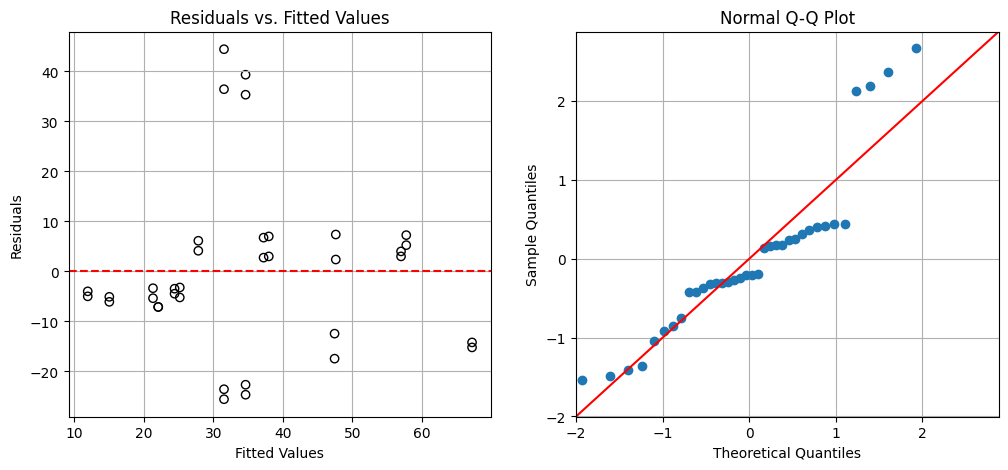

In [161]:
residuals = model_final.resid
fitted = model_final.fittedvalues

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.scatter(fitted, residuals, edgecolors='k', facecolors='none')
ax1.axhline(y=0, color='red', linestyle='--')
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs. Fitted Values')
ax1.grid(True)

sm.qqplot(residuals, line='45', fit=True, ax=ax2)
ax2.set_title('Normal Q-Q Plot')
ax2.grid(True)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2)

plt.show()

Sem spokojenej rozhodně

---
**e) Plot the residuals versus the predicted yields and versus each of the five factors. Comment on the plots.**

---


In [141]:
residuals = pd.Series(model.resid, name="Residuals")
df_with_resid = pd.concat([df626, residuals], axis=1)

In [143]:
df_with_resid.head()

,A,B,C,D,E,Yield,Residuals
0,-1.0,-1.0,-1.0,-1.0,-1.0,7,-4.484722
1,1.0,-1.0,-1.0,-1.0,-1.0,9,-4.977778
2,-1.0,1.0,-1.0,-1.0,-1.0,34,4.936111
3,1.0,1.0,-1.0,-1.0,-1.0,55,6.838889
4,-1.0,-1.0,1.0,-1.0,-1.0,16,4.936111


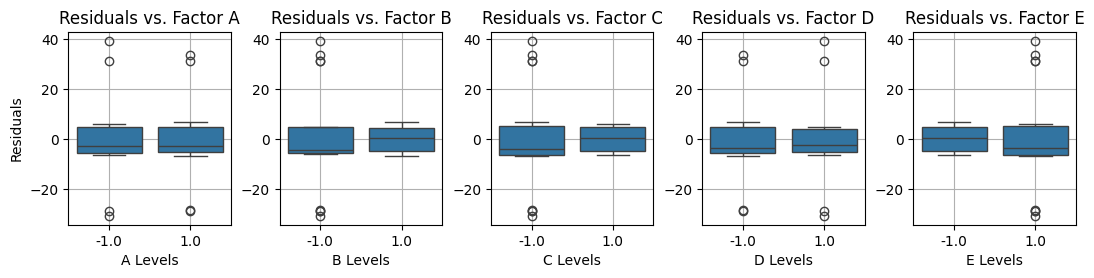

In [168]:
# Create the figure with two subplots
fig =  plt.figure(figsize=(13, 2.5))

# Create a grid of subplots for the residuals vs. factors
factor_cols = ['A', 'B', 'C', 'D', 'E']
for i, factor in enumerate(factor_cols):
    ax = fig.add_subplot(1, 5, i+1)
    sns.boxplot(x=factor, y="Residuals", data=df_with_resid, ax=ax)
    ax.set_xlabel(f"{factor} Levels")
    if i == 0:
        ax.set_ylabel("Residuals")
    else:
        ax.set_ylabel(None)
    ax.set_title(f"Residuals vs. Factor {factor}")
    ax.grid(True)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

plt.show()

Both the residuals against the predicted values and the residuals for the factors seem to be unbiased and also they seem to have a similar variance. 

---
**f) Interpret any significant interactions.**

---

A recap of the factors:
> +    A = aperture setting (small, large),
> +    B = exposure time (20% below nominal, 20% above nominal),
> +    C = development time (30 and 45 s),
> +    D = mask dimension (small, large), and
> +    E = etch time (14.5 and 15.5min).

and the model
> $$
\text{Yield} = 11.97 + 15.89 B + 19.58 E + 16.65 A\cdot B - 18.83 C \cdot E
$$
> 
The interactions that are left in the model are
+ `A:B` and `C:E`

which are in the experiment setting
+ **aperture setting** $\times$ **exposure time** (16.65)
+ **developement time** $\times$ **etch time** (-18.83)

This gives them the obvious physical interpretation. 
+ Both **aperture setting** and the **exposure time** are related to the illumination that the lasers take upon the crystals. _Hence more power from the lasers, more yield!_
+ **Developement time** and **etch time** are both related to the chemicals that are applyied after the laser exposure. _The more time we spend on this process, the less yield!_ (Tak určitě makes sense...)

---
**g) What are your recommendations regarding process
operating conditions?**

---


Given the model above, since **etch time** is not only present in the interaction but also independently with a high coefficient, I would recommend keeping it _long (15.5min)_ and _reducing_ the **development time** _(30 s)_. A _large_ **aperture setting** and **exposure time** (from the interaction and the independent factor).

---
**h) Project the $2^5$ design in this problem into a $2^k$ design
in the important factors. Sketch the design and show
the average and range of yields at each run. Does
this sketch aid in interpreting the results of this
experiment?**

---


---
**i) Suppose that the experimenter had run four center points in addition to the 32 trials in the original experiment. The yields obtained at the
center point runs were 68, 74, 76, and 70. Reanalyze the experiment, including a test for pure quadratic curvature. Discuss what your next step would be.**

---


In [172]:
df626.tail(4)

,A,B,C,D,E,Yield
32,-1.0,-1.0,-1.0,-1.0,1.0,68
33,1.0,-1.0,-1.0,-1.0,1.0,74
34,-1.0,-1.0,-1.0,1.0,1.0,76
35,1.0,-1.0,-1.0,1.0,1.0,70


Jesus fucking crist! I fucking hate this shit! I made a model and now they are telling me that I should have used only the first 32 data points and should have left the rest for the center points. For god sake, why couldn't they have written that at the fucking beginning of the excercise!

---
**j) Construct and analyze a design in two blocks with ABCDE
confounded with blocks.**

---


---
**k) Assuming now that four blocks are
necessary. Suggest a reasonable confounding scheme.**

---


---
**l) Suppose that it was necessary to run this design in four blocks
with ACDE and BCD (and consequently ABE) confounded.
Analyze the data from this design.**

---